In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import HTML
import datetime
import seaborn as sns

PROJ_PATH = '/home/anthony/personalSite/content/project/internet-traffic/'
pd.set_option('max_colwidth', 1000)

%run ./ping_helps.ipynb
%run ./graph_helps.ipynb

clean = read_all()

clean['hour'] = clean['tstamp'].apply(lambda x: x.hour)
clean['day'] =  clean['tstamp'].apply(lambda x: x.isoweekday())  
clean['date'] = clean['tstamp'].apply(lambda x: pd.to_datetime(x).date())

#clean[clean['lat'] > 6000] # Investigate those 3 outliers

TICK_SIZE = 10
LAB_SIZE = 15

DOW_MAP = {1:'Monday',
           2:'Tuesday',
           3:'Wednesday',
           4:'Thursday',
           5:'Friday',
           6:'Saturday',
           7:'Sunday'
}

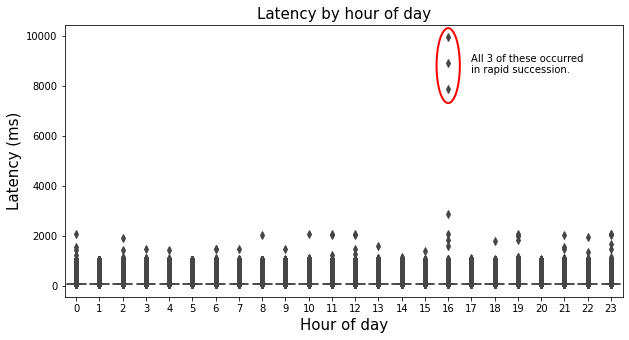

In [2]:
from matplotlib.patches import Ellipse
sns.boxplot(x='hour', y='lat', data=clean);
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(10)

ax = plt.gca();
ellipse = Ellipse(xy=(16, 8800), width=1, height=3000, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse);

plt.annotate('All 3 of these occurred \nin rapid succession.', xy=(17, 8500))
plt.xlabel('Hour of day', fontsize=LAB_SIZE)
plt.ylabel('Latency (ms)', fontsize=LAB_SIZE)
plt.title('Latency by hour of day', fontsize=LAB_SIZE)

plt.savefig(PROJ_PATH+'yikes2.png')

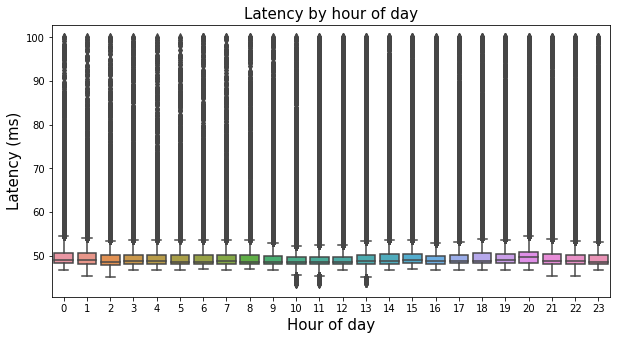

In [3]:
sns.boxplot(x='hour', y='lat', data=clean[clean['lat'] <= 100]);
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(10)
plt.xlabel('Hour of day', fontsize=LAB_SIZE)
plt.ylabel('Latency (ms)', fontsize=LAB_SIZE)
plt.title('Latency by hour of day', fontsize=LAB_SIZE)
plt.savefig(PROJ_PATH+'fix.png')

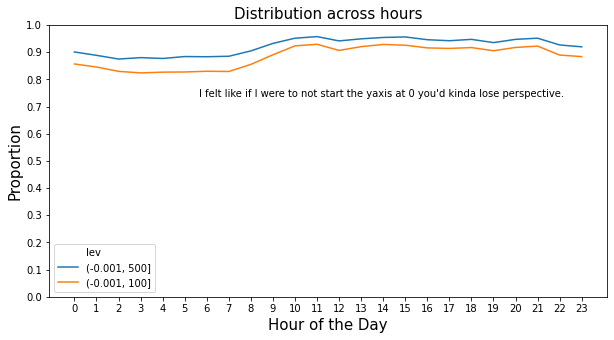

In [6]:
a = bucket_dist('hour', 
                'lat', 
                np.arange(0, 1100, 500), 
                pd.Interval(-.001, 500), 
                label=pd.Interval(-.001, 500), df=clean)

b = bucket_dist('hour', 
                'lat', 
                np.arange(0, 1100, 100), 
                pd.Interval(-.001, 100), 
                label=pd.Interval(-.001, 100), df=clean)

# Create the plot
(
    pd.concat([a, b]).reset_index()
    .pipe(lambda df: sns.lineplot(x='hour', y='lat', hue='lev', data = df))
)

plt.xlabel('Hour of the Day', fontsize=LAB_SIZE);
plt.xticks(np.arange(24));

plt.ylim((0, 1));
plt.yticks(np.arange(0, 1.1, .1));
plt.ylabel('Proportion', fontsize=LAB_SIZE)
plt.title('Distribution across hours', fontsize=LAB_SIZE)
annot = 'I felt like if I were to not start the yaxis at 0 you\'d kinda lose perspective.'
plt.annotate(annot, xy = (150,200), xycoords = 'axes pixels')
plt.gcf().set_figheight(5);
plt.gcf().set_figwidth(10);